<a href="https://colab.research.google.com/github/Nirrax/zed_lab/blob/main/ZED_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zadania 1. Statystyczna analiza danych w języku Python

2. Otworzyć plik train.csv, zaimportować podstawowe funkcje:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
from google.colab import drive

drive.mount('/gdrive')
filePath = '/gdrive/My Drive/Studia/VIII semestr/ZED/Dane/train.csv'
data = pd.read_csv(filePath,
delimiter=r",")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


3. Wyświetlić nazwy zmiennych

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

5. Określić rodzaj zmiennych przez zdefiniowanie ich jako kategoryczne dla zmiennych
Survived, Pclass, Name, Sex, Ticket, Cabin, Embarked

In [ ]:
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Name'] = data['Name'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Ticket'] = data['Ticket'].astype('category')
data['Cabin'] = data['Cabin'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

6. Wyznaczyć liczności poszczególnych kategorii dla zmiennych kategorycznych Survived,
Sex i Embarked

In [ ]:
data['Survived'].value_counts(sort=False)
data['Sex'].value_counts(sort=False)
data['Embarked'].value_counts(sort=False)

,count
Embarked,
C,168
Q,77
S,644


7. Wyświetlić zmienną Age

In [ ]:
data.Age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
data['Age'][:10]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


8. Wyświetlić średnią i odchylenie standardowe wieku

In [ ]:
data.Age.mean()

np.float64(29.69911764705882)

In [ ]:
data.Age.std()

14.526497332334044

9. Wyznaczyć rozstęp dla wieku jako różnicę pomiędzy max i min

In [ ]:
print('Range=%.3f' % (data.Age.max() - data.Age.min()))

Range=79.580


10. Wyznaczyć rozstęp międzykwartylowy dla zmienej Age jako różnicę pomiędzy górnym
i dolnym kwartylem (quantile(0.75, quantile(0.25)).

In [ ]:
data.Age.quantile(0.75) - data.Age.quantile(0.25)

np.float64(17.875)

11. Wyznaczyć współczynnik zmienności (stosunek odchylenia standardowego do średniej
wyrażony w procentach) dla zmienej Age.

In [ ]:
coefficient_of_variation = (data.Age.std() / data.Age.mean()) * 100
coefficient_of_variation

np.float64(48.912218554656754)

12. Wyznaczyć współczynnik asymetrii (skew()) oraz kurtozę (kurt()) dla zmienej Age.

In [ ]:
data.Age.skew()

np.float64(0.38910778230082704)

In [ ]:
data.Age.kurt()

np.float64(0.17827415364210353)

13. Wyznaczyć liczbę brakujących wartości dla zmienej Age.

In [ ]:
data.Age.isnull().sum()

np.int64(177)

14. Wyświetlić podstawowe statystyki opisowe dla zmiennych numerycznych za pomocą
polecenia describe

In [ ]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


15. Sprawdzić testem Shapiro-Wilka zgodność rozkładu z rozkładem normalnym dla
zmiennej Age.

In [ ]:
from scipy.stats import shapiro
a = data.dropna()
print(a)
stat, p = shapiro(a.Age)
print(stat, p)
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

     PassengerId Survived Pclass  \
1              2        1      1   
3              4        1      1   
6              7        0      1   
10            11        1      3   
11            12        1      1   
..           ...      ...    ...   
871          872        1      1   
872          873        0      1   
879          880        1      1   
887          888        1      1   
889          890        1      1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith

16. Sporządzić histogram dla zmiennej Age (plt.hist)

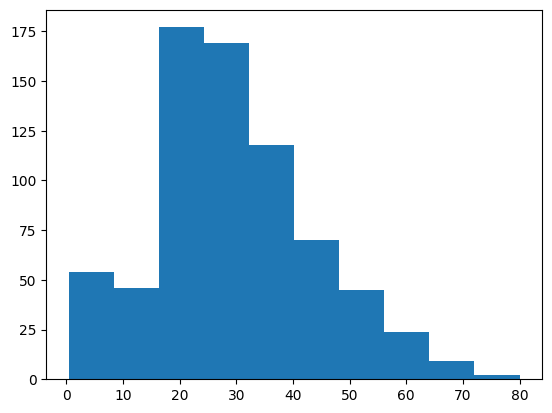

In [ ]:
plt.hist(data.Age)
plt.show()

# Zadania 2. Praca własna

2. Wczytać plik z danymi, zapoznać się z jego zwartością, wyświetlić nazwy zmiennych.

In [ ]:
filePath = '/gdrive/My Drive/Studia/VIII semestr/ZED/Dane/grains.xlsx'
data = pd.read_excel(filePath)

In [ ]:
data.describe()

,compactness,width,length,area,perimeter
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.870486,3.150889,5.739218,14.598443,13.852035
std,0.067641,0.393240,0.487407,3.094116,1.653274
min,0.600000,2.500000,4.824561,9.649123,11.228070
25%,0.840000,2.807018,5.350877,11.699754,12.543860
50%,0.880000,3.157895,5.614035,14.307287,13.421053
75%,0.920000,3.421053,6.184211,16.822004,15.449562
max,0.970000,3.991228,6.973684,21.993307,17.807018


In [ ]:
data.columns

Index(['group', 'compactness', 'width', 'length', 'area', 'perimeter'], dtype='object')

In [ ]:
data['group'] = data['group'].astype('category')
data.groupby('group').count()

<ipython-input-8-d456d26d2187>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('group').count()


,compactness,width,length,area,perimeter
group,,,,,
canadian,48,48,48,48,48
kama,48,48,48,48,48
rosa,48,48,48,48,48


4. Wyznaczyć podstawowe miary statystyczne dla parametrów geometrycznych ziaren
każdej odmiany oddzielnie.

In [ ]:
for group in data['group'].unique():
  print(f"\nPodstawowe miary statystyczne dla odmiany {group}:")
  subset = data[data['group'] == group]
  print(subset[['area', 'perimeter', 'length']].describe())



Podstawowe miary statystyczne dla odmiany kama:
            area  perimeter     length
count  48.000000  48.000000  48.000000
mean   14.188661  13.271199   5.595760
std     1.251327   0.573848   0.235555
min    11.320791  11.754386   5.043860
25%    13.177613  12.883772   5.482456
50%    14.339028  13.355263   5.614035
75%    14.937770  13.695176   5.745614
max    16.784011  14.517544   6.228070

Podstawowe miary statystyczne dla odmiany canadian:
            area  perimeter     length
count  48.000000  48.000000  48.000000
mean   11.433967  12.368421   5.311586
std     0.738295   0.513005   0.190695
min     9.649123  11.228070   4.824561
25%    10.994249  12.105263   5.175439
50%    11.358303  12.280702   5.307018
75%    11.853167  12.642544   5.405702
max    13.559942  13.684211   5.789474

Podstawowe miary statystyczne dla odmiany rosa:
            area  perimeter     length
count  48.000000  48.000000  48.000000
mean   18.172700  15.916484   6.310307
std     1.889859   0.882414   

## 5. Wykorzystując statystyczne testy istotności zweryfikować następujące hipotezy:

a. Rozkład długości ziaren odmiany Kama jest zgodny z rozkładem normalnym
(shapiro(array))

In [ ]:
from scipy.stats import shapiro
a = data.dropna()
stat, p = shapiro(a[a['group'] == 'kama']['length'])
print(stat, p)
alpha = 0.05
if p > alpha:
  print('Próbka wygląda na zgodną z rozkładem normalnym \n(Nie ma podstaw do odrzucenia H0)')
else:
  print('Próbka nie wygląda na zgodną z rozkładem normalnym \n(odrzucić H0)')

0.9648526242011641 0.1584238037320142
Próbka wygląda na zgodną z rozkładem normalnym 
(Nie ma podstaw do odrzucenia H0)


b. Średnia długość ziaren odmiany Kama wynosi 5.5 mm (ttest_1samp(array, mean))

In [ ]:
from scipy.stats import ttest_1samp
a = data[data['group'] == 'kama']['length']
t_statistic, p_value = ttest_1samp(a, 5.5)
print(f"Statystyka t: {t_statistic}")
print(f"Wartość p: {p_value}")
alpha = 0.05
if p > alpha:
  print('Średnia długość ziaren wygląda na 5.5mm \n(Nie ma podstaw do odrzucenia H0)')
else:
  print('Średnia długośc ziaren nie wynosi 5.5mm \n(odrzucić H0)')

Statystyka t: 2.8165251458733978
Wartość p: 0.007075412167958026
Średnia długość ziaren wygląda na 5.5mm 
(Nie ma podstaw do odrzucenia H0)


c. Rozkład długości ziaren odmiany Rosa jest zgodny z rozkładem normalnym
(shapiro(array))

In [ ]:
from scipy.stats import shapiro
a = data.dropna()
print(a)
stat, p = shapiro(a[a['group'] == 'rosa']['length'])
print(stat, p)
alpha = 0.05
if p > alpha:
  print('Próbka wygląda na zgodną z rozkładem normalnym \n(Nie ma podstaw do odrzucenia H0)')
else:
  print('Próbka nie wygląda na zgodną z rozkładem normalnym \n(odrzucić H0)')

    group  compactness     width    length       area  perimeter
0    kama         0.91  3.201754  5.833333  15.287397  13.903509
1    kama         0.93  3.201754  5.570176  14.735304  13.552632
2    kama         0.96  3.289474  5.438597  14.404433  13.201755
3    kama         0.95  3.245614  5.350877  13.890813  12.982456
4    kama         0.97  3.464912  5.745614  16.062635  13.859649
..    ...          ...       ...       ...        ...        ...
139  rosa         0.60  3.684211  5.833333  16.662820  17.807018
140  rosa         0.82  3.552632  6.359649  17.834334  15.833334
141  rosa         0.85  3.201754  6.228070  16.093414  14.780702
142  rosa         0.70  3.508772  6.447369  18.117114  17.280702
143  rosa         0.80  3.421053  6.052632  16.589721  15.438597

[144 rows x 6 columns]
0.979814775910444 0.5710109959268561
Próbka wygląda na zgodną z rozkładem normalnym 
(Nie ma podstaw do odrzucenia H0)


d. Wariancja długości ziaren odmiany Kama jest równa wariancji długości ziaren
odmiany Rosa (levene(array1, array2)).

In [ ]:
from scipy.stats import levene
kama_length = data[data['group'] == 'kama']['length']
rosa_length = data[data['group'] == 'rosa']['length']
t_statistic, p_value = levene(kama_length, rosa_length)
print(f"Statystyka t: {t_statistic}")
print(f"Wartość p: {p_value}")
alpha = 0.05
if p > alpha:
  print('Wariancja długości ziaren odmiany Kama wygląda na równą wariancji długości ziaren odmiany Rosa \n(Nie ma podstaw do odrzucenia H0)')
else:
  print('Wariancja długości ziaren odmiany Kama nie wygląda na równą wariancji długości ziaren odmiany Rosa \n(odrzucić H0)')

Statystyka t: 2.441417522798125
Wartość p: 0.12152992552493813
Wariancja długości ziaren odmiany Kama wygląda na równą wariancji długości ziaren odmiany Rosa 
(Nie ma podstaw do odrzucenia H0)


e. Średnia długość ziaren odmiany Kama jest równa średniej długości ziaren odmiany
Rosa (ttest_ind(array1, array2)). Wykorzystać test parametryczny.

In [ ]:
from scipy.stats import ttest_ind
kama_length = data[data['group'] == 'kama']['length']
rosa_length = data[data['group'] == 'rosa']['length']
t_statistic, p_value = ttest_ind(kama_length, rosa_length)
print(f"Statystyka t: {t_statistic}")
print(f"Wartość p: {p_value}")
alpha = 0.05
if p > alpha:
  print('Średnia długość ziaren odmiany Kama wygląda na równą średniej długości ziaren odmiany Rosa  \n(Nie ma podstaw do odrzucenia H0)')
else:
  print('Średnia długość ziaren odmiany Kama nie wygląda na równą średniej długości ziaren odmiany Rosa  \n(odrzucić H0)')

Statystyka t: -12.974726685134593
Wartość p: 1.143323154111328e-22
Średnia długość ziaren odmiany Kama wygląda na równą średniej długości ziaren odmiany Rosa  
(Nie ma podstaw do odrzucenia H0)


f. Średnia długość ziaren odmiany Kama jest równa średniej długości ziaren odmiany
Rosa (ttest_ind(array1, array2)). Wykorzystać test nieparametryczny

In [ ]:
from scipy.stats import mannwhitneyu
kama_length = data[data['group'] == 'kama']['length']
rosa_length = data[data['group'] == 'rosa']['length']
t_statistic, p_value = mannwhitneyu(kama_length, rosa_length)
print(f"Statystyka t: {t_statistic}")
print(f"Wartość p: {p_value}")
alpha = 0.05
if p > alpha:
  print('Średnia długość ziaren odmiany Kama wygląda na równą średniej długości ziaren odmiany Rosa \n(Nie ma podstaw do odrzucenia H0)')
else:
  print('Średnia długość ziaren odmiany Kama nie wygląda na równą średniej długości ziaren odmiany Rosa  \n(odrzucić H0)')

Statystyka t: 76.5
Wartość p: 3.1551426989385397e-15
Średnia długość ziaren odmiany Kama wygląda na równą średniej długości ziaren odmiany Rosa 
(Nie ma podstaw do odrzucenia H0)


g. Brak zależności pomiędzy polem powierzchni i obwodem ziaren odmiany Rosa
(pearsonr(array1, array2)). Wykonać wykres punktowy dla tych zmiennych.

In [ ]:
from scipy.stats import pearsonr
rosa_area = data[data['group'] == 'rosa']['area']
rosa_perimeter = data[data['group'] == 'rosa']['perimeter']
t_statistic, p_value = pearsonr(rosa_area,rosa_perimeter)
print(f"Statystyka t: {t_statistic}")
print(f"Wartość p: {p_value}")
alpha = 0.05
if p > alpha:
  print('Brak zależności pomiędzy polem powierzchni i obwodem ziaren odmiany Rosa \n(Nie ma podstaw do odrzucenia H0)')
else:
  print('Istnieje zależność pomiędzy polem powierzchni i obwodem ziaren odmiany Rosa  \n(odrzucić H0)')


Statystyka t: 0.5959191062516025
Wartość p: 7.868253961403351e-06
Brak zależności pomiędzy polem powierzchni i obwodem ziaren odmiany Rosa 
(Nie ma podstaw do odrzucenia H0)


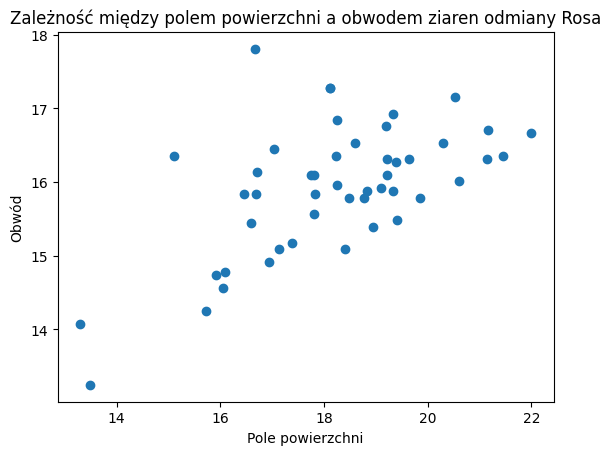

In [ ]:
plt.scatter(rosa_area, rosa_perimeter)
plt.xlabel("Pole powierzchni")
plt.ylabel("Obwód")
plt.title("Zależność między polem powierzchni a obwodem ziaren odmiany Rosa")
plt.show()